# Assignment 4
<br>*Last edit: 2/26/2021*

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# Neural Net
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# other things
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Prepare the data

In [2]:
# 
path = os.getcwd() + '\\personal_playlists_categorized.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
target = data['target']
# Remove features that don't contribute to the classification of the tracks
del data['target']
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']

del data['time_signature']

'''target=target.replace(to_replace="jazz",value="0")
target=target.replace(to_replace="blues",value="1")
target=target.replace(to_replace="soul",value="2")'''

'''target=target.replace(to_replace="indie",value="0")
target=target.replace(to_replace="rock",value="1")
target=target.replace(to_replace="pop",value="2")
target=target.replace(to_replace="hiphop",value="3")
target=target.replace(to_replace="country",value="4")
target=target.replace(to_replace="randb",value="5")
target=target.replace(to_replace="latin",value="6")
target=target.replace(to_replace="dance",value="7")
target=target.replace(to_replace="folk",value="8")
target=target.replace(to_replace="jazz",value="9")
target=target.replace(to_replace="classical",value="10")
target=target.replace(to_replace="soul",value="11")
target=target.replace(to_replace="punk",value="12")
target=target.replace(to_replace="metal",value="13")
target=target.replace(to_replace="reggae",value="14")'''

data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.710,0.598,5,-7.598,0,0.0319,0.5080,0.000000,0.0971,0.5010,119.981,256320
1,0.717,0.347,11,-10.265,0,0.0636,0.0511,0.000002,0.0870,0.0589,84.987,235477
2,0.866,0.530,0,-6.347,0,0.0495,0.5170,0.001590,0.0946,0.2030,104.952,197973
3,0.397,0.172,6,-15.698,0,0.0445,0.8410,0.000068,0.1080,0.1230,101.275,265120
4,0.492,0.260,9,-17.341,0,0.0921,0.6460,0.001780,0.0705,0.3120,111.519,347227


In [3]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1680, 12), (560, 12), (1680,), (560,))

In [4]:
# Test many models
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [5]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [6]:
for model in classifiers:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_df = pd.DataFrame(conf_matrix)
    display(conf_df)
    print(classification_report(y_test, y_pred))

,0,1,2,3,4
0,18,14,31,7,2
1,19,16,22,12,6
2,38,34,93,35,6
3,32,22,54,32,4
4,7,14,27,13,2


               precision    recall  f1-score   support

hip-hop-chill       0.16      0.25      0.19        72
       mellow       0.16      0.21      0.18        75
       moving       0.41      0.45      0.43       206
        party       0.32      0.22      0.26       144
upbeat-summer       0.10      0.03      0.05        63

     accuracy                           0.29       560
    macro avg       0.23      0.23      0.22       560
 weighted avg       0.29      0.29      0.28       560



,0,1,2,3,4
0,1,0,71,0,0
1,0,0,73,0,2
2,0,0,206,0,0
3,0,0,141,3,0
4,0,2,61,0,0


               precision    recall  f1-score   support

hip-hop-chill       1.00      0.01      0.03        72
       mellow       0.00      0.00      0.00        75
       moving       0.37      1.00      0.54       206
        party       1.00      0.02      0.04       144
upbeat-summer       0.00      0.00      0.00        63

     accuracy                           0.38       560
    macro avg       0.47      0.21      0.12       560
 weighted avg       0.52      0.38      0.21       560



,0,1,2,3,4
0,41,10,4,17,0
1,9,43,10,13,0
2,3,12,157,33,1
3,19,1,24,100,0
4,7,13,18,24,1


               precision    recall  f1-score   support

hip-hop-chill       0.52      0.57      0.54        72
       mellow       0.54      0.57      0.56        75
       moving       0.74      0.76      0.75       206
        party       0.53      0.69      0.60       144
upbeat-summer       0.50      0.02      0.03        63

     accuracy                           0.61       560
    macro avg       0.57      0.52      0.50       560
 weighted avg       0.60      0.61      0.58       560



,0,1,2,3,4
0,37,3,5,27,0
1,3,20,32,20,0
2,2,2,176,25,1
3,5,1,31,107,0
4,1,3,32,27,0


               precision    recall  f1-score   support

hip-hop-chill       0.77      0.51      0.62        72
       mellow       0.69      0.27      0.38        75
       moving       0.64      0.85      0.73       206
        party       0.52      0.74      0.61       144
upbeat-summer       0.00      0.00      0.00        63

     accuracy                           0.61       560
    macro avg       0.52      0.48      0.47       560
 weighted avg       0.56      0.61      0.56       560



,0,1,2,3,4
0,0,72,0,0,0
1,0,75,0,0,0
2,0,206,0,0,0
3,0,144,0,0,0
4,0,63,0,0,0


               precision    recall  f1-score   support

hip-hop-chill       0.00      0.00      0.00        72
       mellow       0.13      1.00      0.24        75
       moving       0.00      0.00      0.00       206
        party       0.00      0.00      0.00       144
upbeat-summer       0.00      0.00      0.00        63

     accuracy                           0.13       560
    macro avg       0.03      0.20      0.05       560
 weighted avg       0.02      0.13      0.03       560



C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4
0,55,10,0,7,0
1,5,46,7,7,10
2,5,7,156,22,16
3,19,1,25,94,5
4,9,9,21,16,8


               precision    recall  f1-score   support

hip-hop-chill       0.59      0.76      0.67        72
       mellow       0.63      0.61      0.62        75
       moving       0.75      0.76      0.75       206
        party       0.64      0.65      0.65       144
upbeat-summer       0.21      0.13      0.16        63

     accuracy                           0.64       560
    macro avg       0.56      0.58      0.57       560
 weighted avg       0.62      0.64      0.63       560



,0,1,2,3,4
0,0,2,16,53,1
1,4,1,18,51,1
2,3,1,121,79,2
3,1,1,18,124,0
4,2,1,10,49,1


               precision    recall  f1-score   support

hip-hop-chill       0.00      0.00      0.00        72
       mellow       0.17      0.01      0.02        75
       moving       0.66      0.59      0.62       206
        party       0.35      0.86      0.50       144
upbeat-summer       0.20      0.02      0.03        63

     accuracy                           0.44       560
    macro avg       0.28      0.30      0.23       560
 weighted avg       0.38      0.44      0.36       560



,0,1,2,3,4
0,42,20,1,9,0
1,7,47,9,9,3
2,1,16,153,30,6
3,13,5,15,106,5
4,3,20,14,18,8


               precision    recall  f1-score   support

hip-hop-chill       0.64      0.58      0.61        72
       mellow       0.44      0.63      0.51        75
       moving       0.80      0.74      0.77       206
        party       0.62      0.74      0.67       144
upbeat-summer       0.36      0.13      0.19        63

     accuracy                           0.64       560
    macro avg       0.57      0.56      0.55       560
 weighted avg       0.63      0.64      0.62       560



               precision    recall  f1-score   support

hip-hop-chill       0.65      0.75      0.70        72
       mellow       0.58      0.55      0.56        75
       moving       0.75      0.81      0.78       206
        party       0.64      0.74      0.69       144
upbeat-summer       0.35      0.11      0.17        63

     accuracy                           0.67       560
    macro avg       0.59      0.59      0.58       560
 weighted avg       0.64      0.67      0.65       560



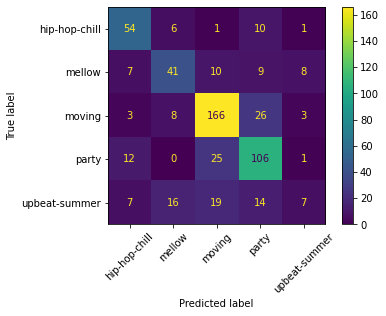

In [7]:
# Random Forest Classifier No Regularization
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

               precision    recall  f1-score   support

hip-hop-chill       0.64      0.58      0.61        72
       mellow       0.44      0.63      0.51        75
       moving       0.80      0.74      0.77       206
        party       0.62      0.74      0.67       144
upbeat-summer       0.36      0.13      0.19        63

     accuracy                           0.64       560
    macro avg       0.57      0.56      0.55       560
 weighted avg       0.63      0.64      0.62       560



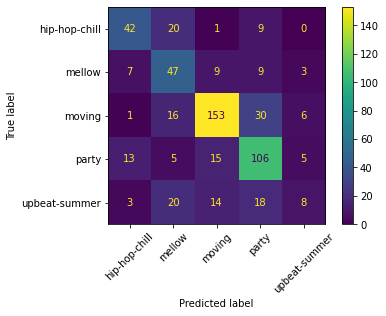

In [8]:
# Quad Discriminant No Regularization
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

               precision    recall  f1-score   support

hip-hop-chill       1.00      0.01      0.03        72
       mellow       0.00      0.00      0.00        75
       moving       0.37      1.00      0.54       206
        party       1.00      0.02      0.04       144
upbeat-summer       0.00      0.00      0.00        63

     accuracy                           0.38       560
    macro avg       0.47      0.21      0.12       560
 weighted avg       0.52      0.38      0.21       560



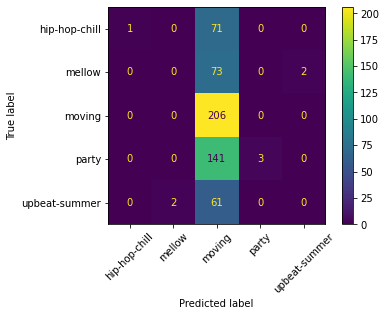

In [9]:
# SVC No Regularization
model = SVC(gamma=2, C=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

In [10]:
# MLP
# Reload dataset
path = os.getcwd() + '\\personal_playlists_categorized.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
target = data['target']
# Remove features that don't contribute to the classification of the tracks
del data['target']
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']

del data['time_signature']

target=target.replace(to_replace="mellow",value="0")
target=target.replace(to_replace="hip-hop-chill",value="1")
target=target.replace(to_replace="party",value="2")
target=target.replace(to_replace="moving",value="3")
target=target.replace(to_replace="upbeat-summer",value="4")
# Convert labels to numbers
'''target=target.replace(to_replace="indie",value="0")
target=target.replace(to_replace="rock",value="1")
target=target.replace(to_replace="pop",value="2")
target=target.replace(to_replace="hiphop",value="3")
target=target.replace(to_replace="country",value="4")
target=target.replace(to_replace="randb",value="5")
target=target.replace(to_replace="latin",value="6")
target=target.replace(to_replace="dance",value="7")
target=target.replace(to_replace="folk",value="8")
target=target.replace(to_replace="jazz",value="9")
target=target.replace(to_replace="classical",value="10")
target=target.replace(to_replace="soul",value="11")
target=target.replace(to_replace="punk",value="12")
target=target.replace(to_replace="metal",value="13")
target=target.replace(to_replace="reggae",value="14")'''

'target=target.replace(to_replace="indie",value="0")\ntarget=target.replace(to_replace="rock",value="1")\ntarget=target.replace(to_replace="pop",value="2")\ntarget=target.replace(to_replace="hiphop",value="3")\ntarget=target.replace(to_replace="country",value="4")\ntarget=target.replace(to_replace="randb",value="5")\ntarget=target.replace(to_replace="latin",value="6")\ntarget=target.replace(to_replace="dance",value="7")\ntarget=target.replace(to_replace="folk",value="8")\ntarget=target.replace(to_replace="jazz",value="9")\ntarget=target.replace(to_replace="classical",value="10")\ntarget=target.replace(to_replace="soul",value="11")\ntarget=target.replace(to_replace="punk",value="12")\ntarget=target.replace(to_replace="metal",value="13")\ntarget=target.replace(to_replace="reggae",value="14")'

In [11]:
# Regularize data
x = data.values
min_max_scalar = preprocessing.MinMaxScaler()
x_scaled = min_max_scalar.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)
print(data)

      danceability    energy       key  loudness  mode  speechiness  \
0         0.707036  0.602180  0.454545  0.749257   0.0     0.010948   
1         0.714659  0.349389  1.000000  0.674454   0.0     0.049086   
2         0.876933  0.533695  0.000000  0.784344   0.0     0.032122   
3         0.366151  0.173139  0.545455  0.522073   0.0     0.026107   
4         0.469614  0.261768  0.818182  0.475991   0.0     0.083373   
...            ...       ...       ...       ...   ...          ...   
2235      0.628621  0.533695  0.727273  0.752903   0.0     0.096487   
2236      0.578523  0.842886  0.363636  0.766394   0.0     0.017685   
2237      0.686343  0.468231  0.272727  0.736271   0.0     0.032964   
2238      0.208234  0.199325  0.818182  0.718012   1.0     0.009865   
2239      0.882379  0.705916  0.454545  0.805464   0.0     0.027671   

      acousticness  instrumentalness  liveness   valence     tempo  \
0         0.510039          0.000000  0.079419  0.498114  0.440925   
1      

              precision    recall  f1-score   support

           0       0.64      0.59      0.61        75
           1       0.67      0.78      0.72        72
           2       0.64      0.70      0.67       144
           3       0.74      0.84      0.79       206
           4       0.41      0.11      0.18        63

    accuracy                           0.68       560
   macro avg       0.62      0.60      0.59       560
weighted avg       0.66      0.68      0.66       560



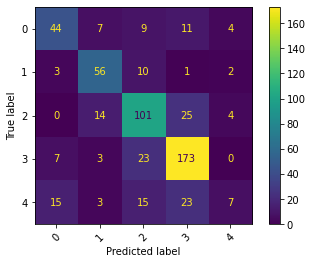

In [12]:
# Random Forest Classifier Post-Regularization
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

              precision    recall  f1-score   support

           0       0.44      0.63      0.51        75
           1       0.64      0.58      0.61        72
           2       0.62      0.74      0.67       144
           3       0.80      0.74      0.77       206
           4       0.36      0.13      0.19        63

    accuracy                           0.64       560
   macro avg       0.57      0.56      0.55       560
weighted avg       0.63      0.64      0.62       560



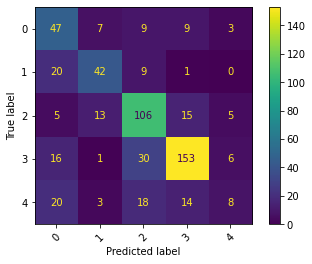

In [13]:
# Quad Discriminant Post-Regularization
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

              precision    recall  f1-score   support

           0       0.52      0.45      0.48        75
           1       0.65      0.74      0.69        72
           2       0.65      0.69      0.67       144
           3       0.72      0.85      0.78       206
           4       0.47      0.13      0.20        63

    accuracy                           0.66       560
   macro avg       0.60      0.57      0.56       560
weighted avg       0.64      0.66      0.63       560



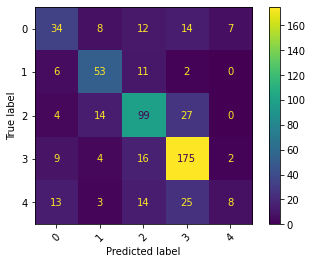

In [14]:
# SVC Post-Regularization
model = SVC(gamma=2, C=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

              precision    recall  f1-score   support

           0       0.63      0.55      0.59        75
           1       0.71      0.79      0.75        72
           2       0.65      0.73      0.69       144
           3       0.73      0.84      0.79       206
           4       0.38      0.10      0.15        63

    accuracy                           0.68       560
   macro avg       0.62      0.60      0.59       560
weighted avg       0.66      0.68      0.66       560



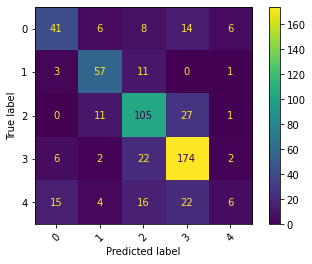

In [15]:
# adaboost
base_model = RandomForestClassifier(n_estimators=100)
base_model.fit(x_train, y_train)

model = AdaBoostClassifier(base_estimator=base_model, n_estimators=10, learning_rate=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

In [16]:
# Onehot after split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

y_train_1hot = []
for data in y_train:
    hot = np.zeros(5)
    hot[int(data)] = 1
    y_train_1hot.append(hot)
        
y_test_1hot = []
for data in y_test:
    hot = np.zeros(5)
    hot[int(data)] = 1
    y_test_1hot.append(hot)
    
y_train_1hot = np.asarray(y_train_1hot)
y_test_1hot = np.asarray(y_test_1hot)

In [17]:
print(x_train.shape)
print(y_train_1hot.shape)

(1680, 12)
(1680, 5)


In [18]:
# 1 hidden layer, Adam
model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=[12]))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizers.Adam(learning_rate=0.001, beta_1=0.95),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train_1hot, batch_size=32, epochs=10, validation_data=(x_test, y_test_1hot))

Epoch 1/10


InternalError:  Blas GEMM launch failed : a.shape=(32, 12), b.shape=(12, 256), m=32, n=256, k=12
	 [[node sequential/dense/MatMul (defined at <ipython-input-19-6c51d4180139>:1) ]] [Op:__inference_train_function_582]

Function call stack:
train_function


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)
print('Test accuracy:', test_acc)

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)

print(test_acc)

In [ ]:
# 2 hidden layers, Adam
model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=[12]))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizers.Adam(learning_rate=0.00025, beta_1=0.95),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_1hot, batch_size=16, epochs=10, validation_data=(x_test, y_test_1hot))

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)
print('Test accuracy:', test_acc)

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)

print(test_acc)

In [ ]:
model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=[12]))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizers.SGD(learning_rate=0.25),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_1hot, batch_size=16, epochs=20, validation_data=(x_test, y_test_1hot))

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)
print('Test accuracy:', test_acc)

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)

print(test_acc)

In [ ]:
# 
path = os.getcwd() + '\\personal_playlists_categorized.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
# Remove features that don't contribute to the classification of the tracks
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']

In [ ]:
colors = {'indie':'red','rock':'green','pop':'blues','hiphop':'purple',
          'country':'yellow','randb':'orange','latin':'pink','dance':'cyan',
          'folk':'teal','jazz':'brown','classical':'salmon','soul':'navy',
          'punk':'slategrey','metal':'darkgoldenrod','reggae':'darkkhaki'}

'''legend_elements = [Line2D([0], [0], marker='o', color='w', label='Jazz',
                          markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='Rock',
                          markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='Hip-hop',
                          markerfacecolor='b', markersize=15)]'''


fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Danceability vs. Energy]')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')

# How danceable the song is vs the energy/intensity of the song
ax.scatter(data['danceability'], data['energy'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='upper left')

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Valence vs. Acousticness]')
ax.set_xlabel('Valence')
ax.set_ylabel('Acousticness')

# Audience in recording vs use of acoustic instruments
ax.scatter(data['valence'], data['acousticness'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='upper right')

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Energy vs. Loudness]')
ax.set_xlabel('Energy')
ax.set_ylabel('Loudness')

# Happiness/valence vs tempo
ax.scatter(data['energy'], data['loudness'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='lower right')

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Speechiness vs. Instrumentalness]')
ax.set_xlabel('Speechiness')
ax.set_ylabel('Instrumentalness')

# Use of words vs use of instruments
ax.scatter(data['speechiness'], data['instrumentalness'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='upper right')

plt.show()